# Sistemas Inteligentes

## Exercício Computacional 1 - Classificação

Neste laboratório serão explorados os classificadores **KNN** e **Decision Tree**. Também vamos explorar a métrica de **Acurácia** e conhecer a **Confusion Matrix**.

### Identificação do Aluno

#### Nome Completo

Luana Ferreira do Nascimento

#### RA

11090115

### Importação e preparação dos dados

Importe o pacote **datasets** da biblioteca **sklearn**, então carregue o dataset de imagens de dígitos, utilizando a função **load_digits()** do pacote de datasets importado, já atribuindo-o à variável **digits_dataset**.

In [1]:
import sklearn.datasets as datasets
digits_dataset = datasets.load_digits()

print(digits_dataset)

{'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16

Tendo feito o processo adequadamente, a variável **digits_dataset** conterá todo o dataset correspondente, inclusive com informações que não são de nosso interesse para esta atividade. Para selecionar apenas o que é de nosso interesse, atribua à variável **digits_img** apenas o objeto **images** de **digits_dataset**.

In [2]:
digits_img = digits_dataset.images

print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Verifique o formato de **digits_img**.

In [3]:
type(digits_img)

numpy.ndarray

Imprima **digits_img** para que seja possível ver como são os dados que temos no momento.

In [4]:
print(digits_img)

[[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [ 0.  0.  5. ... 12.  0.  

Sabendo que esta estrutura se refere a um conjunto de imagens, pode ser interessante imprimir ao menos uma ou duas para visualizarmos como é o seu padrão.

Para fazer isso, importe o pacote de funções **pyplot** da biblioteca **matplotlib**. Apesar de não ser obrigatório, para facilitar, recomenda-se utilizar um "apelido" para esse tipo de pacote com nome tão grande, a fim de tornar o seu uso mais prático. É comum utilizar o termo "plt" para o pyplot, mas você pode chamar como preferir.

In [5]:
import matplotlib.pyplot as plt

Depois de importar o pacote, utilize a função **imshow()** do **pyplot** para imprimir na tela uma das imagens contidas em **digits_img**.

Obs: caso tenha sido utilizado um apelido na importação do pacote, lembre-se dele quando for chamar suas funções, como é o caso agora.

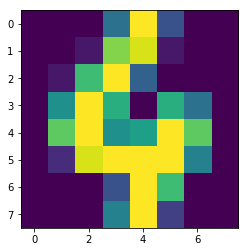

In [6]:
plt.imshow(digits_img[64]) # são imagens dos números

Apesar de esse tipo de formato permitir que essas imagens sejam elegantemente exibidas a nós, humanos, não se trata de um formato tão interessante para se efetuar processamentos computacionais. Por isso, faça uma mudança no formato da estrutura utilizando a função **reshape()** da biblioteca **numpy**. Como tal biblioteca ainda não for importada, comece por sua importação, preferencialmente utilizando o apelido "np" para tornar mais prática a sua utilização.

In [7]:
import numpy as np
digits_img.size

115008

Agora, com a biblioteca já importada, utilize a função **reshape()** para forçar um formato unidimensional para cada imagem dentro da matriz original.

Note que o número de imagens não pode ser alterado, tampouco as imagens em si; apenas o formato da representação de cada uma dessas imagens pode sofrer alteração.

In [8]:
#cria uma nova variável para guardar as imagens convertidas
digits_imgConvertida = []

#cria um loop para transformar o formato das imagens
for i in range(len(digits_img)):
    digits_imgConvertida.append(np.reshape(digits_img[i], -1,1)) # não tenho certeza se está certo, o -1 significa indefinido

# print(digits_imgConvertida)

Agora verifique se o novo formato está como desejava-se obter. Se o novo formato for bidimensional, o número de imagens for o mesmo que o original e o número de pixels for o mesmo que o original, então está correto.

In [9]:
print("Verificando o número de imagens: \n----------")

print("Convertida: ")
print(len(digits_imgConvertida))

print("\nOriginal:")
print(len(digits_img))


print("\n\nVerificando o número de pixels: \n----------")

print("Convertida: ")
print(len(digits_imgConvertida[0]))

print("\nOriginal:")
print(digits_img[0].size)

Verificando o número de imagens: 
----------
Convertida: 
1797

Original:
1797


Verificando o número de pixels: 
----------
Convertida: 
64

Original:
64


Agora que já temos os dados de entrada adequadamente preparados, precisamos dos dados de saída correspondentes. Então, atribua o objeto **target** de **digits_dataset** à variável **digits_target**.

In [10]:
digits_target = digits_dataset.target

Imprima **digits_target** para visualizar como são esses dados

In [11]:
print(digits_target)

[0 1 2 ... 8 9 8]


Agora imprima o formato de **digits_target** para saber exatamente as suas dimensões.

In [12]:
type(digits_target)

numpy.ndarray

#### Divisão dos dados em grupos para treinamento e teste.

Importe a função **train_test_split()** do pacote **model_selection**, pertencente à biblioteca **sklearn**.

In [13]:
from sklearn.model_selection import train_test_split

Agora, utilizando a função **train_test_split()**, divida os dados de entrada e saída, **digits** e **digits_target**, respectivamente, separando-os em dados de treinamento e de testes para entrada e saída, ou seja, **x_train**, **x_test**, **y_train** e **y_test**.

Separe 25% para testes utilizando o argumento *test_size* da própria função **train_test_split()**.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(digits_imgConvertida, digits_target, test_size=0.25)

Imprima, em diferentes células, o formato de cada uma das partes obtidas.

In [15]:
type(X_train)

list

In [16]:
type(X_test)

list

In [17]:
type(y_train)

numpy.ndarray

In [18]:
type(y_test)

numpy.ndarray

### K-Nearest Neighbors (KNN)

#### Treinamento

Importe o classificador do KNN, que é uma função chamada **KNeighborsClassifier** do pacote **neighbors**, que faz parte da biblioteca **sklearn**.

In [19]:
from sklearn.neighbors import KNeighborsClassifier as knc

Agora crie o classificador com o nome **knn** utilizando para o argumento *n_neighbors* da função **KNeighborsClassifier** o número de vizinhos próximos que serão considerados pelo algoritmo. Lembre-se de preferir um número ímpar não muito grande.

In [20]:
knn = knc(n_neighbors=9)

Treine o classificador **knn** por meio de sua própria função **fit()**, atribuindo o resultado ao próprio **knn**. Os argumentos da função **fit()** são os dados de entrada e saída de treinamento, ou seja, **x_train** e **y_train**.

In [21]:
knn.fit(X_train, y_train) # to usando shoft+tab para ver a documentação das funções

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

#### Classificação

Então, faça a classificação (também chamada de predição), utilizando a função **predict()** do próprio classificador **knn**. O argumento da função é apenas a entrada de teste, ou seja, **x_test**. Atribua a saída dessa classificação à variável **y_pred**.

In [22]:
y_pred = knn.predict(X_test)

#### Resultados

Para analisar os resultados, precisamos utilizar algumas ferramentas e métricas. A biblioteca **sklearn** possui um grande conjunto de funções para essa finalidade em seu pacote **metrics**. Importe as funções **accuracy_score** e **confusion_matrix**.

In [23]:
from sklearn.metrics import accuracy_score as accuracy_score
from sklearn.metrics import confusion_matrix as confusion_matrix

Comece utilizando a função **accuracy_score** para calcular a acurácia do classificador. Esta é uma das mais comuns métricas para se verificar o desempenho do classificador. O primeiro argumento da função é o conjunto de saídas esperadas, ou seja, **y_test**; o segundo, o conjunto de saídas obtidas pela predição do classificador utilizado, ou seja, **y_pred**.

In [24]:
accuracy_score(y_test, y_pred)

0.98

Gere a matriz de confusão utilizando a função **confusion_matrix**.

In [25]:
confusion_matrix(y_test, y_pred) # não sei se os argumentos são esses mesmo

array([[47,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 41,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 41,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 39,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0, 44,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 59,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 51,  0],
       [ 0,  1,  0,  1,  0,  0,  0,  0,  0, 43]], dtype=int64)

### Decision Tree

#### Treinamento

In [26]:
from sklearn.tree import DecisionTreeClassifier as dtc

Assim como foi feito com o KNN, crie um classificador de Decision Tree chamado **dt** utilizando agora a função **DecisionTreeClassifier**.

In [27]:
dt = dtc()

Treine classificador **dt** utilizando a função **fit** com os dados de treinamento, **x_train** e **y_train**, respectivamente.

In [28]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Classificação

Faça a classificação dos dados de entrada para testes, **x_test**, utilizando a função **predict** do próprio **dt** e armazene os resultados em **y_pred**.

In [29]:
y_pred = dt.predict(X_test)

#### Resultados

Verifique a acurácia do classificador **dt** por meio da função **accuracy_score**.

In [32]:
accuracy_score(y_test, y_pred)

0.8311111111111111

Mostre a matriz de confusão do classificador **dt** utilizando a função **confusion_matrix**.

In [31]:
confusion_matrix(y_test, y_pred)

array([[43,  0,  0,  0,  0,  0,  2,  0,  0,  2],
       [ 0, 34,  3,  0,  1,  0,  0,  1,  1,  1],
       [ 0,  1, 26,  1,  1,  0,  0,  0,  3,  1],
       [ 0,  0,  1, 35,  0,  0,  0,  1,  3,  1],
       [ 0,  0,  0,  1, 33,  2,  1,  3,  1,  0],
       [ 0,  1,  0,  0,  2, 37,  2,  1,  0,  1],
       [ 0,  0,  0,  0,  3,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  4,  3,  0,  0, 48,  3,  1],
       [ 0,  1,  2,  4,  0,  2,  0,  1, 40,  5],
       [ 0,  1,  1,  3,  0,  0,  0,  1,  2, 37]], dtype=int64)

## Questões

### 1. O que você entende por "acurácia"? Esta métrica é suficiente para avaliar o desempenho de um classificador? Se não, o que mais poderia ser utilizado? E por que?

É a porcentagem de acertos que o algoritmo consegue ter com os dados testados. Esta métrica sozinha não é suficiente para avaliar o desempenho de um classificador pois pode acontecer dele ficar específico demais para a base de dados que foi treinado e não ser mais eficiente para classificar novos dados.

### 2. Que tipo de informação a matriz de confusão oferece sobre o classificador?

Ela mostra quantos elementos foram categorizados corretamente e como foram classificados os que não acertaram

### 3. O que representa cada linha dessa matriz? E cada coluna? E a diagonal principal?

Cada linha é a quantidade de números reais, cada coluna é quantos o algoritmo classificou daquela determinada forma. A diagonal principal são os que foram classificados corretamente.

### 4. Seria possível avaliar, ainda que superficialmente, o desempenho de um classificador se utilizássemos apenas pixels em escala de cinza para representar os valores de uma matriz de confusão? Por que?

Sim, pois ainda seria possível ver a densidade de acertos e onde estão os erros mais comuns

### 5. Quais critérios você utilizaria para escolher o número de vizinhos do algoritmo KNN? Por que? E como isso pode influenciar no desempenho do algoritmo?

Devemos utilizar um número ímpar para evitar empates e um número que não seja maior que a metade das amostras, pois desta forma seria possível que  o algoritmofizesse a comparação com itens muito distantes.

### 6. Algum dos dois classificadores explorados neste laboratório é não paramétrico? Se sim, o que o permite fazer tal afirmação?

Existem vários tipos de algoritmos classificadores, que por sua vez são categorizados em paramétricos e não paramétricos (RICHARDS & JIA, 2006). O primeiro tipo tem caráter probabilístico e está baseado na distribuição normal dos dados. Já os classificadores não paramétricos têm natureza determinística e podem ser utilizados com dados que não se comportam com as características da curva normal (ADREOLA, 2009).

O método KNeighborsClassifier é não paramétrico pois não parte de uma distribuição de características já conhecida.

### 7. Qual dos dois classificadores se saiu melhor neste laboratório? Por que? Caso fossem utilizados estes mesmos classificadores para classificar digitos de outra base de dados, o classificador com melhor desempenho ainda seria necessariamente o mesmo? Por que?

O melhor classificador foi o KNN, pois ele não é paramétrico e este problema pode variar muito. Por este mesmo motivo caso estivessemos avaliando outra base de dados, o melhor classificador provavelmente ainda seria o KNN.

## Referências

[Scikit-Learn - Datasets](http://scikit-learn.org/stable/datasets/index.html)

[Matplotlib - Pyplot](https://matplotlib.org/api/pyplot_summary.html)

[Numpy](https://docs.scipy.org/doc/numpy/reference/)

[Scikit-Learn - Train, Test and Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

[Scikit-Learn - KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)

[Scikit-Learn - DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

[Scikit-Learn - Accuracy Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

[Scikit-Learn - Confusion Matrix](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)